In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

     ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
     --------------------------------------- 0.0/99.7 MB 219.4 kB/s eta 0:07:35
     --------------------------------------- 0.1/99.7 MB 252.2 kB/s eta 0:06:36
     --------------------------------------- 0.1/99.7 MB 252.2 kB/s eta 0:06:36
     --------------------------------------- 0.1/99.7 MB 275.8 kB/s eta 0:06:02
     --------------------------------------- 0.1/99.7 MB 275.8 kB/s eta 0:06:02
     --------------------------------------- 0.1/99.7 MB 285.2 kB/s eta 0:05:50
     --------------------------------------- 0.1/99.7 MB 285.2 kB/s eta 0:05:50
     --------------------------------------- 0.1/99.7 MB 212.1 kB/s eta 0:07:50
     --------------------------------------- 0.1/99.7 MB 230.3 kB/s eta 0:07:13
     --------------------------------------- 0.2/99.7 MB 252.2 k

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('creditcard.csv')

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


        Missing Values  Percentage
Time                 0         0.0
V1                   0         0.0
V2                   0         0.0
V3                   0         0.0
V4                   0         0.0
V5                   0         0.0
V6                   0         0.0
V7                   0         0.0
V8                   0         0.0
V9                   0         0.0
V10                  0         0.0
V11                  0         0.0
V12                  0         0.0
V13                  0         0.0
V14                  0         0.0
V15                  0         0.0
V16                  0         0.0
V17                  0         0.0
V18                  0         0.0
V19                  0         0.0
V20                  0         0.0
V21                  0         0.0
V22                  0         0.0
V23                  0         0.0
V24                  0         0.0
V25                  0         0.0
V26                  0         0.0
V27                 

In [3]:
from sklearn.preprocessing import StandardScaler

# Select the features (X) to be scaled
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Replace the original columns with the scaled features
df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']] = X_scaled


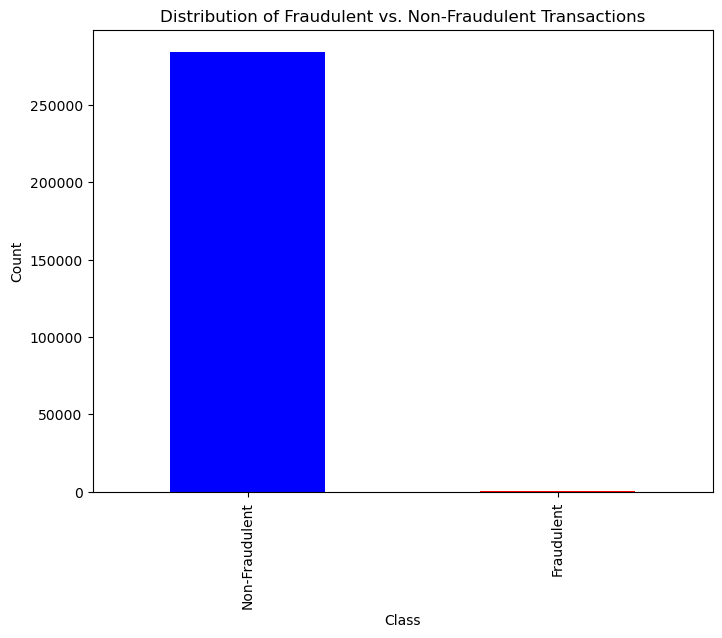

In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


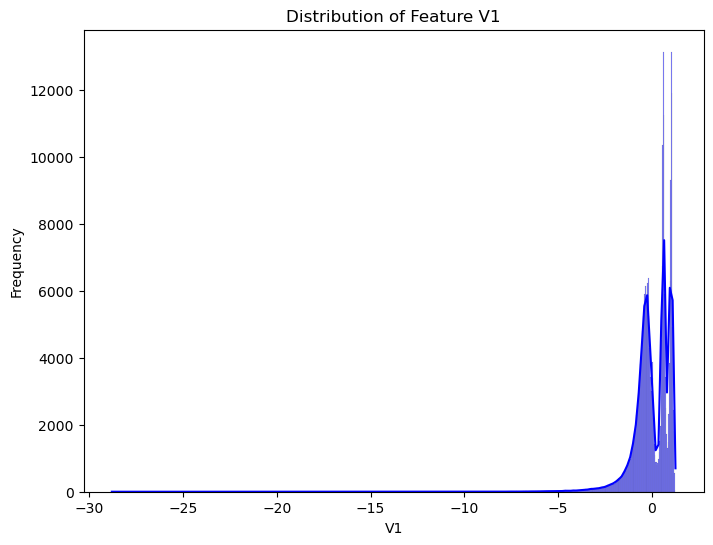

In [5]:
# Visualize the distribution of a single feature (e.g., 'V1')
plt.figure(figsize=(8, 6))
sns.histplot(df['V1'], kde=True, color='blue')
plt.title('Distribution of Feature V1')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.show()


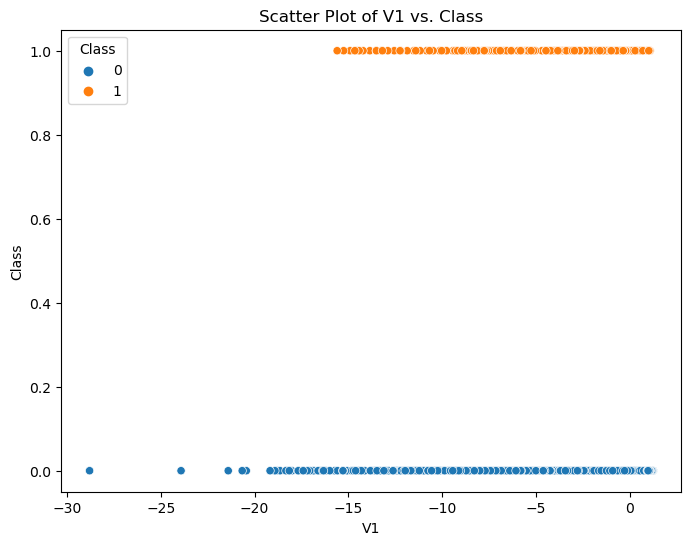

In [6]:
# Create a scatter plot to examine a relationship (e.g., 'V1' vs. 'Class')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='V1', y='Class', hue='Class')
plt.title('Scatter Plot of V1 vs. Class')
plt.xlabel('V1')
plt.ylabel('Class')
plt.show()


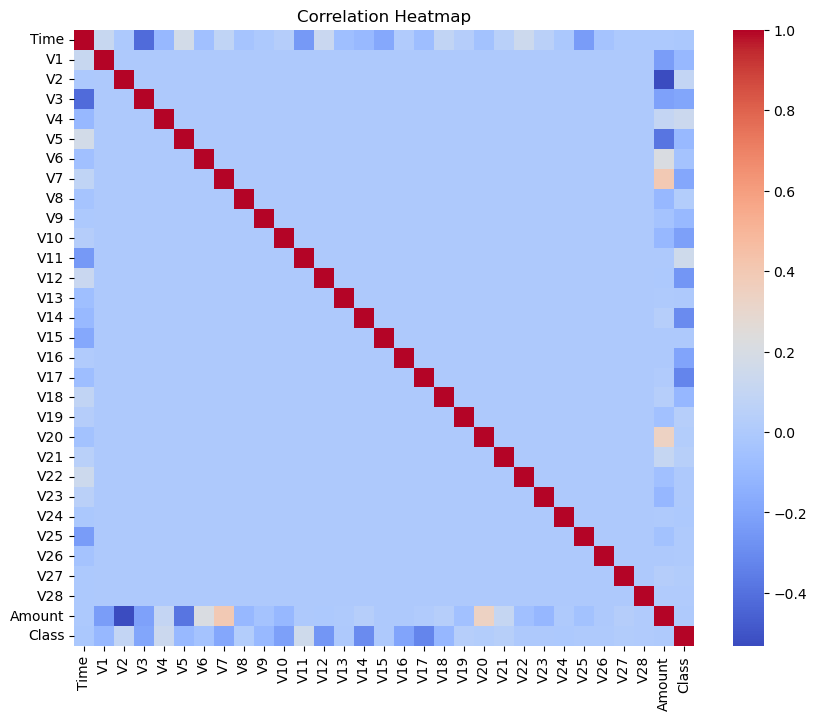

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


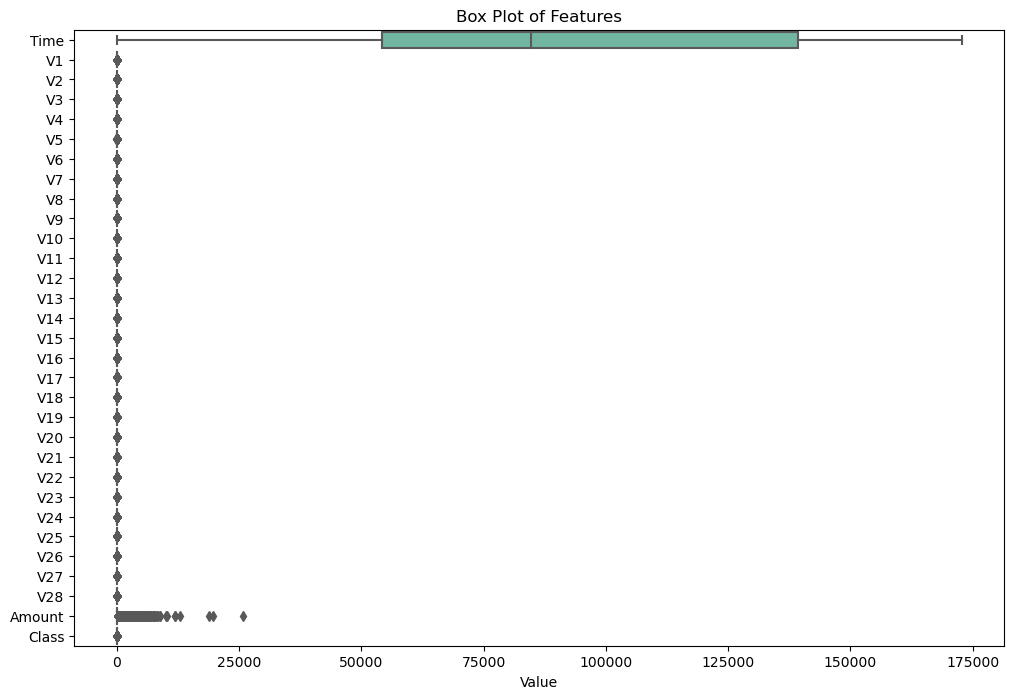

In [8]:
# Generate basic summary statistics for the dataset
summary_statistics = df.describe()

# Check for the presence of outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plot of Features')
plt.xlabel('Value')
plt.show()


In [9]:
df['hour_of_day'] = df['Time'] % 24


In [10]:
df['log_amount'] = np.log1p(df['Amount'])


In [11]:
X = df.drop('Class', axis=1)  # Features (excluding the 'Class' column)
y = df['Class']  # Target variable

k = 10  # Number of features to select
feature_selector = SelectKBest(f_classif, k=k)
X = feature_selector.fit_transform(X, y)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [15]:

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.85
Recall: 0.57
F1-Score: 0.68


In [16]:
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 0.97
Recall: 0.80
F1-Score: 0.88


In [22]:
model= xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
print(f'Mean Squared_Error: {mse}')

Mean Squared_Error: 0.00047285892096887244
